Loading the data path (kaggle)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-data/fraud_data_updated.csv


In [2]:
full_data=pd.read_csv('/kaggle/input/fraud-data/fraud_data_updated.csv')

LOADING THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

In [5]:
full_data=full_data.drop(['Unnamed:_0'],axis=1)
#te=te.drop(['client_id','creation_date'],axis=1)


scaler = MinMaxScaler()
print(full_data)

        Unnamed: 0  tarif_type  disrict  client_catg  region  \
0                0          11       60           11     101   
1                1          11       69           11     107   
2                2          11       62           11     301   
3                3          11       69           11     105   
4                4          11       62           11     303   
...            ...         ...      ...          ...     ...   
204897      204897          40       63           11     311   
204898      204898          11       63           11     311   
204899      204899          40       63           11     311   
204900      204900          10       60           11     101   
204901      204901          11       60           11     101   

        avg_consom_l_1_ELEC  avg_consom_l_1_GAZ  var_consom_l_1_ELEC  \
0                352.400000            0.000000         96313.070588   
1                557.540541            0.000000         39178.644144   
2              

In [8]:
#data splitting and preprocessing 

y_train=full_data['target']
X_train=full_data.drop(['target'],axis=1)
y_train=y_train.astype(int)
x_train,x_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=4,stratify=y_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#te=scaler.fit_transform(te)
print(x_train)

[[0.26044285 0.86486486 0.         ... 0.         0.         0.81818182]
 [0.28116993 0.86486486 0.         ... 0.         0.         1.        ]
 [0.31062318 0.08108108 0.33333333 ... 0.         0.         0.72727273]
 ...
 [0.71392526 0.08108108 0.         ... 0.         0.         0.18181818]
 [0.11899893 0.05405405 0.         ... 0.         0.         0.45454545]
 [0.57132957 0.08108108 0.         ... 0.         0.         0.81818182]]


The SelectKBest method selects the features according to the k highest score. 
By changing the 'score_func' parameter we can apply the method for both classification and regression data. 
Selecting best features is important process when we prepare a large dataset for training.

In [ ]:
# k = 90 # selecting the top k features using SELECTKbest
selector = SelectKBest(f_classif, k=k)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)
x_train = x_train_new
x_test =x_test_new

LGBMClassifier(learning_rate=0.0695305887282317, max_depth=14,
               min_child_samples=11, n_estimators=1954, num_leaves=16383,
               objective='binary', silent=True)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Results on test data
Test accuracy =  0.9412
Test precision =  0.9674
Test recall =  0.0689
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38399
           1       0.97      0.07      0.13      2582

    accuracy                           0.94     40981
   macro avg       0.95      0.53      0.55     40981
weighted avg       0.94      0.94      0.92     40981

Confusion matrix (Rows actual, Columns predicted):
       0    1
0  38393    6
1   2404  178

ROC curve


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


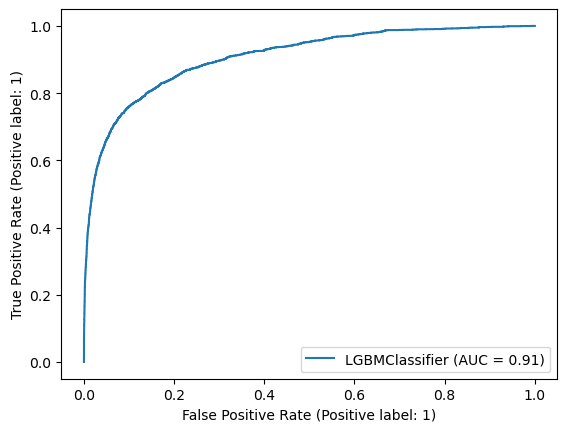

In [13]:
#fitting lgbm to the best k feeatures selected about above using selectB feature selection technique
lgbm_mod = lgb.LGBMClassifier(boosting_type='gbdt', 
                              num_leaves=2**14-1, 
                              max_depth=14, 
                              learning_rate=0.0695305887282317, 
                              n_estimators=1954, 
                              subsample_for_bin=200000, 
                              objective='binary', 
                              class_weight=None, 
                              min_split_gain=0.0, 
                              min_child_weight=1e-3, 
                              min_child_samples=11, 
                              subsample=1.0, 
                              subsample_freq=0, 
                              colsample_bytree=1.0, 
                              reg_alpha=0.0, 
                              reg_lambda=0.0, 
                              random_state=None, 
                              n_jobs=-1, 
                              silent=True, 
                              importance_type='split')

print(lgbm_mod) # display model parameters
lgbm_mod.fit(x_train_new, y_train ) # train model
pred_lgm = lgbm_mod.predict(x_test) # predicted output for test examples
print("Results on test data")
acc_lgm = accuracy_score(y_test, pred_lgm) # accuracy on test examples
prec_lgm= precision_score(y_test, pred_lgm) # precision on test examples
reca_lgm = recall_score(y_test, pred_lgm) # recall on test examples
print(f'Test accuracy = {acc_lgm: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_lgm: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_lgm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_lgm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_lgm)))
print('\nROC curve')
plot_roc_curve(lgbm_mod, x_test, y_test)
plt.show() 

In [11]:
# Check the class distribution
print('Original dataset shape %s' % Counter(y_train))

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train_new, y_train)

# Check the class distribution after SMOTE
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 153592, 1: 10329})
Resampled dataset shape Counter({0: 153592, 1: 153592})


LGBMClassifier(learning_rate=0.0695305887282317, max_depth=14,
               min_child_samples=11, n_estimators=1954, num_leaves=16383,
               objective='binary', silent=True)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Results on test data
Test accuracy =  0.9431
Test precision =  0.7798
Test recall =  0.1344
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38399
           1       0.78      0.13      0.23      2582

    accuracy                           0.94     40981
   macro avg       0.86      0.57      0.60     40981
weighted avg       0.93      0.94      0.92     40981

Confusion matrix (Rows actual, Columns predicted):
       0    1
0  38301   98
1   2235  347

ROC curve


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


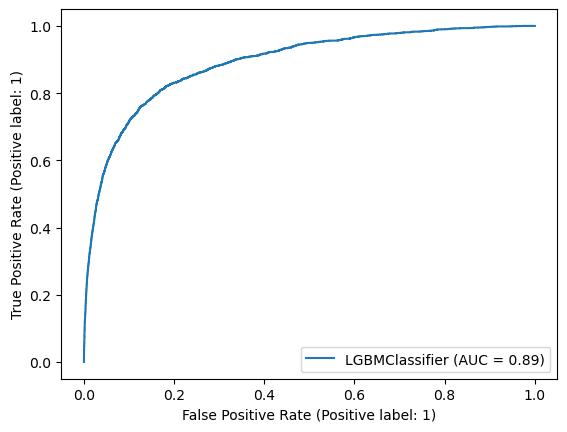

In [12]:
#for top 90 features with smote oversampling technique
lgbm_mod = lgb.LGBMClassifier(boosting_type='gbdt', 
                              num_leaves=2**14-1, 
                              max_depth=14, 
                              learning_rate=0.0695305887282317, 
                              n_estimators=1954, 
                              subsample_for_bin=200000, 
                              objective='binary', 
                              class_weight=None, 
                              min_split_gain=0.0, 
                              min_child_weight=1e-3, 
                              min_child_samples=11, 
                              subsample=1.0, 
                              subsample_freq=0, 
                              colsample_bytree=1.0, 
                              reg_alpha=0.0, 
                              reg_lambda=0.0, 
                              random_state=None, 
                              n_jobs=-1, 
                              silent=True, 
                              importance_type='split')

print(lgbm_mod) # display model parameters
lgbm_mod.fit(X_res, y_res) # train model
pred_lgm = lgbm_mod.predict(x_test) # predicted output for test examples
print("Results on test data")
acc_lgm = accuracy_score(y_test, pred_lgm) # accuracy on test examples
prec_lgm= precision_score(y_test, pred_lgm) # precision on test examples
reca_lgm = recall_score(y_test, pred_lgm) # recall on test examples
print(f'Test accuracy = {acc_lgm: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_lgm: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_lgm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_lgm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_lgm)))
print('\nROC curve')
plot_roc_curve(lgbm_mod, x_test, y_test)
plt.show() 

In [10]:
full_data.shape[1]

137